# Depression Dataset — Clean, EDA, and ML Models (KNN, Decision Tree, Random Forest)

This notebook fixes common errors (wrong column names like `Depression_Level`, mixed encodings, and `KeyError`) by **cleaning column names** and using a **proper sklearn pipeline**.

Dataset file used: `Depression.csv` (kept in the same folder as this notebook).

In [2]:

# If you're running in a different environment, update this path.
CSV_PATH = "Depression.csv"

import pandas as pd
import numpy as np

df = pd.read_csv(CSV_PATH)
print("Shape:", df.shape)
print("Columns:", list(df.columns))
df.head()


Shape: (1977, 18)
Columns: ['1. Age', '2. Gender', '3. University', '4. Department', '5. Academic Year', '6. Current CGPA', 'Unnamed: 6', '1. In a semester, how often have you had little interest or pleasure in doing things? ', '2. In a semester, how often have you been feeling down, depressed or hopeless? ', '3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much? ', '4. In a semester, how often have you been feeling tired or having little energy?', '5. In a semester, how often have you had poor appetite or overeating? ', '6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down? ', '7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television? ', "8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,Unnamed: 6,"1. In a semester, how often have you had little interest or pleasure in doing things?","2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?","7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?","8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?","9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Value \n(max = 27),Depression Level:\n1-4 Minimal depression\n5-9 Mild depression\n10-14 Moderate depression\n15-19 Moderately severe depression\n20-27 Severe depression
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,NaN,1,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,NaN,1,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,NaN,2,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,NaN,1,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,NaN,1,1,1,1,1,1,1,1,1,9,Mild Depression


In [3]:

# ---- 1) Clean messy column names ----
import re

def clean_col(c: str) -> str:
    c = c.strip()
    c = c.replace("\n", " ")
    c = re.sub(r"\s+", " ", c)
    # remove leading numbering like "1. " or "2. "
    c = re.sub(r"^\d+\.\s*", "", c)
    # shorten long question text
    c = c.replace("In a semester, how often have you", "PHQ")
    c = c.replace("been ", "")
    c = c.replace("have you", "")
    c = c.replace("?", "")
    c = c.replace("'", "")
    c = c.replace("/", "_")
    c = re.sub(r"[^0-9a-zA-Z_ ]+", "", c)
    c = c.strip().replace(" ", "_")
    return c

df = df.rename(columns={c: clean_col(c) for c in df.columns})

# Drop empty unnamed columns (common in CSV exports)
unnamed = [c for c in df.columns if c.lower().startswith("unnamed")]
df = df.drop(columns=unnamed, errors="ignore")

print("Cleaned columns:")
for c in df.columns:
    print("-", c)

df.head()


Cleaned columns:
- Age
- Gender
- University
- Department
- Academic_Year
- Current_CGPA
- PHQ_had_little_interest_or_pleasure_in_doing_things
- PHQ_feeling_down_depressed_or_hopeless
- PHQ_had_trouble_falling_or_staying_asleep_or_sleeping_too_much
- PHQ_feeling_tired_or_having_little_energy
- PHQ_had_poor_appetite_or_overeating
- PHQ_feeling_bad_about_yourself__or_that_you_are_a_failure_or_have_let_yourself_or_your_family_down
- PHQ_having_trouble_concentrating_on_things_such_as_reading_the_books_or_watching_television
- PHQ_moved_or_spoke_too_slowly_for_other_people_to_notice_Or_youve_moving_a_lot_more_than_usual_because_youve_restless
- PHQ_had_thoughts_that_you_would_be_better_off_dead_or_of_hurting_yourself
- Depression_Value_max__27
- Depression_Level_14_Minimal_depression_59_Mild_depression_1014_Moderate_depression_1519_Moderately_severe_depression_2027_Severe_depression


,Age,Gender,University,Department,Academic_Year,Current_CGPA,PHQ_had_little_interest_or_pleasure_in_doing_things,PHQ_feeling_down_depressed_or_hopeless,PHQ_had_trouble_falling_or_staying_asleep_or_sleeping_too_much,PHQ_feeling_tired_or_having_little_energy,PHQ_had_poor_appetite_or_overeating,PHQ_feeling_bad_about_yourself__or_that_you_are_a_failure_or_have_let_yourself_or_your_family_down,PHQ_having_trouble_concentrating_on_things_such_as_reading_the_books_or_watching_television,PHQ_moved_or_spoke_too_slowly_for_other_people_to_notice_Or_youve_moving_a_lot_more_than_usual_because_youve_restless,PHQ_had_thoughts_that_you_would_be_better_off_dead_or_of_hurting_yourself,Depression_Value_max__27,Depression_Level_14_Minimal_depression_59_Mild_depression_1014_Moderate_depression_1519_Moderately_severe_depression_2027_Severe_depression
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,1,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,1,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,2,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,1,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,1,1,1,1,1,1,1,1,1,9,Mild Depression


In [4]:

# ---- 2) Identify target columns safely (avoids KeyError) ----
# Some datasets have weird names; we pick by keywords.
target_value_col = [c for c in df.columns if "Depression_Value" in c or ("Value" in c and "Depression" in c)]
target_level_col = [c for c in df.columns if "Depression_Level" in c or ("Level" in c and "Depression" in c)]

print("Candidate value column(s):", target_value_col)
print("Candidate level column(s):", target_level_col)

# Choose the first match
TARGET_VALUE = target_value_col[0] if target_value_col else None
TARGET_LEVEL = target_level_col[0] if target_level_col else None

print("TARGET_VALUE =", TARGET_VALUE)
print("TARGET_LEVEL =", TARGET_LEVEL)

df[TARGET_LEVEL].value_counts()


Candidate value column(s): ['Depression_Value_max__27']
Candidate level column(s): ['Depression_Level_14_Minimal_depression_59_Mild_depression_1014_Moderate_depression_1519_Moderately_severe_depression_2027_Severe_depression']
TARGET_VALUE = Depression_Value_max__27
TARGET_LEVEL = Depression_Level_14_Minimal_depression_59_Mild_depression_1014_Moderate_depression_1519_Moderately_severe_depression_2027_Severe_depression


Depression_Level_14_Minimal_depression_59_Mild_depression_1014_Moderate_depression_1519_Moderately_severe_depression_2027_Severe_depression
Moderately Severe Depression    495
Severe Depression               488
Moderate Depression             449
Mild Depression                 408
Minimal Depression               93
No Depression                    44
Name: count, dtype: int64

In [5]:

# ---- 3) Basic data checks ----
print(df.isna().sum().sort_values(ascending=False).head(20))
print("\nDuplicates:", df.duplicated().sum())

# Show class balance
level_counts = df[TARGET_LEVEL].value_counts()
level_pct = (level_counts / len(df) * 100).round(2)
pd.DataFrame({"count": level_counts, "percent": level_pct})


Age                                                                                                                                            0
PHQ_feeling_tired_or_having_little_energy                                                                                                      0
Depression_Value_max__27                                                                                                                       0
PHQ_had_thoughts_that_you_would_be_better_off_dead_or_of_hurting_yourself                                                                      0
PHQ_moved_or_spoke_too_slowly_for_other_people_to_notice_Or_youve_moving_a_lot_more_than_usual_because_youve_restless                          0
PHQ_having_trouble_concentrating_on_things_such_as_reading_the_books_or_watching_television                                                    0
PHQ_feeling_bad_about_yourself__or_that_you_are_a_failure_or_have_let_yourself_or_your_family_down                                

,count,percent
Depression_Level_14_Minimal_depression_59_Mild_depression_1014_Moderate_depression_1519_Moderately_severe_depression_2027_Severe_depression,,
Moderately Severe Depression,495,25.04
Severe Depression,488,24.68
Moderate Depression,449,22.71
Mild Depression,408,20.64
Minimal Depression,93,4.70
No Depression,44,2.23


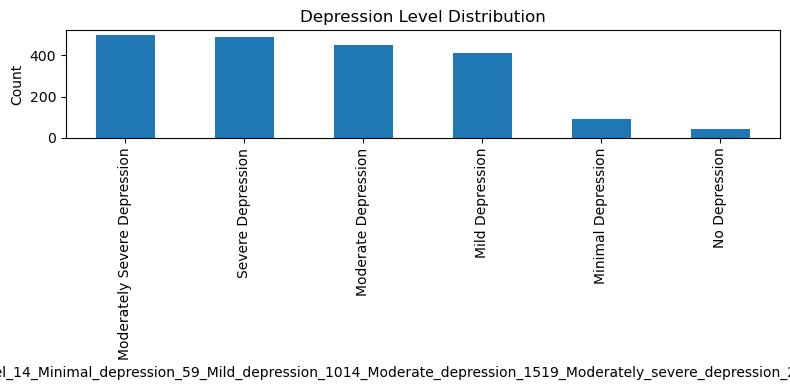

C:\Users\user\AppData\Local\Temp\ipykernel_14644\2074119604.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


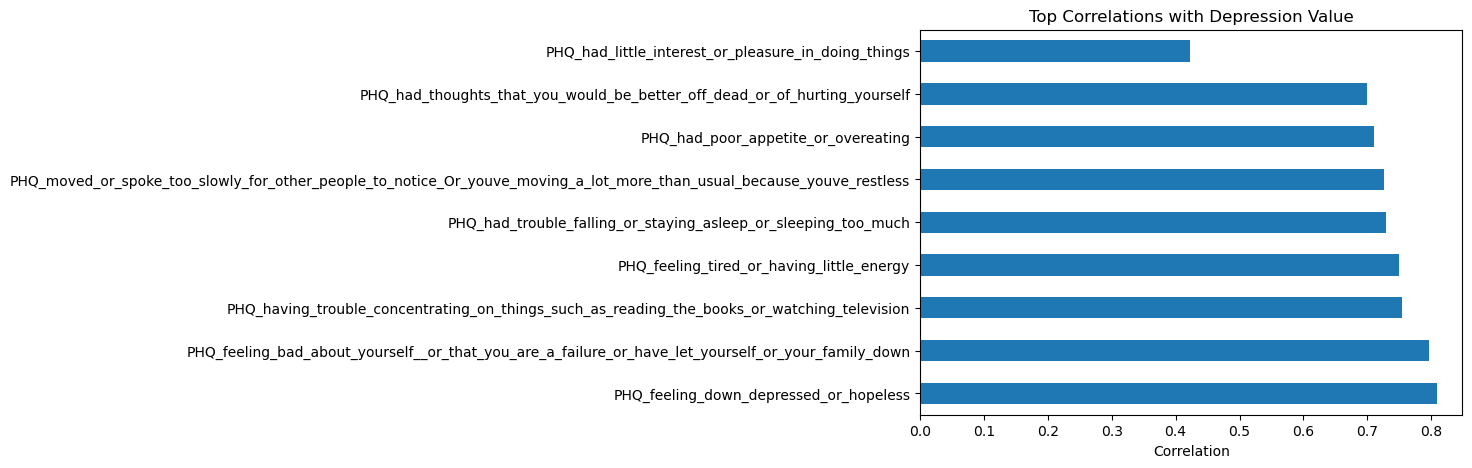

In [6]:

# ---- 4) Quick EDA plots ----
import matplotlib.pyplot as plt

# Class distribution
plt.figure(figsize=(8,4))
df[TARGET_LEVEL].value_counts().plot(kind="bar")
plt.title("Depression Level Distribution")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Numeric feature correlations (PHQ question items + value)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if TARGET_VALUE in num_cols:
    corr = df[num_cols].corr(numeric_only=True)[TARGET_VALUE].sort_values(ascending=False)
    plt.figure(figsize=(7,5))
    corr.drop(index=TARGET_VALUE, errors="ignore").head(12).plot(kind="barh")
    plt.title("Top Correlations with Depression Value")
    plt.xlabel("Correlation")
    plt.tight_layout()
    plt.show()


In [7]:

# ---- 5) Prepare features / target ----
from sklearn.model_selection import train_test_split

# Features: everything except targets
drop_cols = [c for c in [TARGET_LEVEL, TARGET_VALUE] if c is not None]
X = df.drop(columns=drop_cols)

y = df[TARGET_LEVEL]

print("X shape:", X.shape)
print("y shape:", y.shape)

# Train/test split (stratified for classification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.head()


X shape: (1977, 15)
y shape: (1977,)


,Age,Gender,University,Department,Academic_Year,Current_CGPA,PHQ_had_little_interest_or_pleasure_in_doing_things,PHQ_feeling_down_depressed_or_hopeless,PHQ_had_trouble_falling_or_staying_asleep_or_sleeping_too_much,PHQ_feeling_tired_or_having_little_energy,PHQ_had_poor_appetite_or_overeating,PHQ_feeling_bad_about_yourself__or_that_you_are_a_failure_or_have_let_yourself_or_your_family_down,PHQ_having_trouble_concentrating_on_things_such_as_reading_the_books_or_watching_television,PHQ_moved_or_spoke_too_slowly_for_other_people_to_notice_Or_youve_moving_a_lot_more_than_usual_because_youve_restless,PHQ_had_thoughts_that_you_would_be_better_off_dead_or_of_hurting_yourself
1240,18-22,Male,United International University (UIU),Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,2,1,1,2,0,0,0,1,0
948,27-30,Male,Dhaka University of Engineering and Technology...,Engineering - CS / CSE / CSC / Similar to CS,Other,Other,1,2,0,3,1,1,3,1,0
82,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,Other,1,1,2,3,1,1,0,2,0
356,18-22,Female,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,2.50 - 2.99,1,2,3,2,3,3,1,1,2
835,23-26,Female,Dhaka University (DU),Other,Fourth Year or Equivalent,3.00 - 3.39,3,3,2,3,3,3,2,1,3


In [8]:

# ---- 6) Build preprocessing + models (FIX for LabelEncoder errors) ----
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separate column types
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"
)


Numeric: ['PHQ_had_little_interest_or_pleasure_in_doing_things', 'PHQ_feeling_down_depressed_or_hopeless', 'PHQ_had_trouble_falling_or_staying_asleep_or_sleeping_too_much', 'PHQ_feeling_tired_or_having_little_energy', 'PHQ_had_poor_appetite_or_overeating', 'PHQ_feeling_bad_about_yourself__or_that_you_are_a_failure_or_have_let_yourself_or_your_family_down', 'PHQ_having_trouble_concentrating_on_things_such_as_reading_the_books_or_watching_television', 'PHQ_moved_or_spoke_too_slowly_for_other_people_to_notice_Or_youve_moving_a_lot_more_than_usual_because_youve_restless', 'PHQ_had_thoughts_that_you_would_be_better_off_dead_or_of_hurting_yourself']
Categorical: ['Age', 'Gender', 'University', 'Department', 'Academic_Year', 'Current_CGPA']



KNN
Accuracy: 0.7778
F1 (weighted): 0.7701
                              precision    recall  f1-score   support

             Mild Depression       0.66      0.93      0.77        82
          Minimal Depression       0.78      0.39      0.52        18
         Moderate Depression       0.77      0.54      0.64        90
Moderately Severe Depression       0.81      0.80      0.81        99
               No Depression       0.70      0.78      0.74         9
           Severe Depression       0.89      0.92      0.90        98

                    accuracy                           0.78       396
                   macro avg       0.77      0.73      0.73       396
                weighted avg       0.79      0.78      0.77       396



<Figure size 700x600 with 0 Axes>

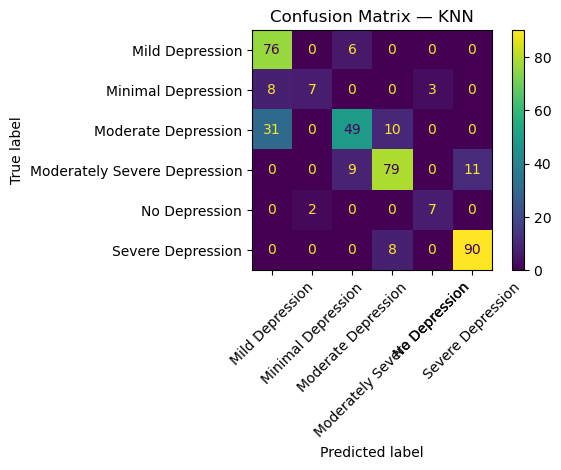


DecisionTree
Accuracy: 0.7551
F1 (weighted): 0.7557
                              precision    recall  f1-score   support

             Mild Depression       0.83      0.82      0.82        82
          Minimal Depression       0.88      0.83      0.86        18
         Moderate Depression       0.67      0.67      0.67        90
Moderately Severe Depression       0.65      0.67      0.66        99
               No Depression       1.00      1.00      1.00         9
           Severe Depression       0.85      0.84      0.84        98

                    accuracy                           0.76       396
                   macro avg       0.81      0.80      0.81       396
                weighted avg       0.76      0.76      0.76       396



<Figure size 700x600 with 0 Axes>

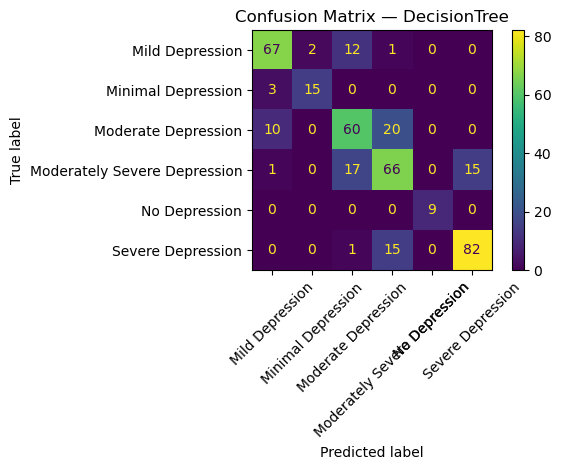


RandomForest
Accuracy: 0.8636
F1 (weighted): 0.8614
                              precision    recall  f1-score   support

             Mild Depression       0.85      0.90      0.88        82
          Minimal Depression       0.90      0.50      0.64        18
         Moderate Depression       0.84      0.86      0.85        90
Moderately Severe Depression       0.83      0.84      0.83        99
               No Depression       1.00      1.00      1.00         9
           Severe Depression       0.92      0.92      0.92        98

                    accuracy                           0.86       396
                   macro avg       0.89      0.84      0.85       396
                weighted avg       0.86      0.86      0.86       396



<Figure size 700x600 with 0 Axes>

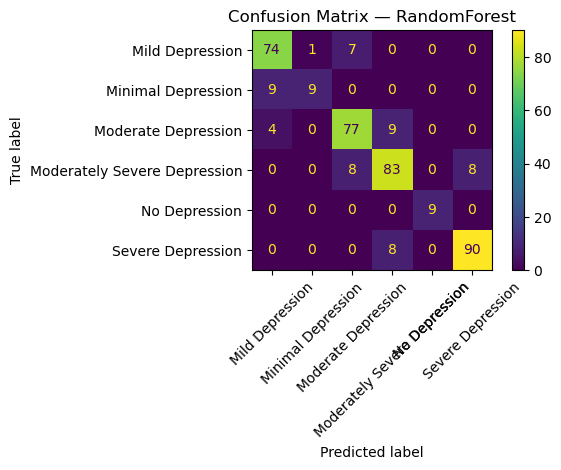

,Model,Accuracy,F1_weighted
2,RandomForest,0.863636,0.861411
0,KNN,0.777778,0.770091
1,DecisionTree,0.755051,0.755745


In [9]:

# ---- 7) Train and evaluate: KNN, Decision Tree, Random Forest ----
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay

models = {
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "DecisionTree": DecisionTreeClassifier(random_state=42, max_depth=None),
    "RandomForest": RandomForestClassifier(random_state=42, n_estimators=300, n_jobs=-1)
}

results = []

for name, clf in models.items():
    pipe = Pipeline(steps=[("preprocess", preprocess),
                          ("model", clf)])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, pred)
    f1w = f1_score(y_test, pred, average="weighted")
    results.append((name, acc, f1w))
    print("\n==============================")
    print(name)
    print("Accuracy:", round(acc, 4))
    print("F1 (weighted):", round(f1w, 4))
    print(classification_report(y_test, pred))

    # Confusion matrix
    plt.figure(figsize=(7,6))
    ConfusionMatrixDisplay.from_predictions(y_test, pred, xticks_rotation=45)
    plt.title(f"Confusion Matrix — {name}")
    plt.tight_layout()
    plt.show()

pd.DataFrame(results, columns=["Model", "Accuracy", "F1_weighted"]).sort_values(by="F1_weighted", ascending=False)


Best params: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 400}
Best CV F1: 0.8598202101388193

Test Accuracy: 0.8636363636363636
Test F1 (weighted): 0.8614423738108653
                              precision    recall  f1-score   support

             Mild Depression       0.85      0.90      0.88        82
          Minimal Depression       0.90      0.50      0.64        18
         Moderate Depression       0.85      0.83      0.84        90
Moderately Severe Depression       0.82      0.86      0.84        99
               No Depression       1.00      1.00      1.00         9
           Severe Depression       0.92      0.92      0.92        98

                    accuracy                           0.86       396
                   macro avg       0.89      0.84      0.85       396
                weighted avg       0.87      0.86      0.86       396



<Figure size 700x600 with 0 Axes>

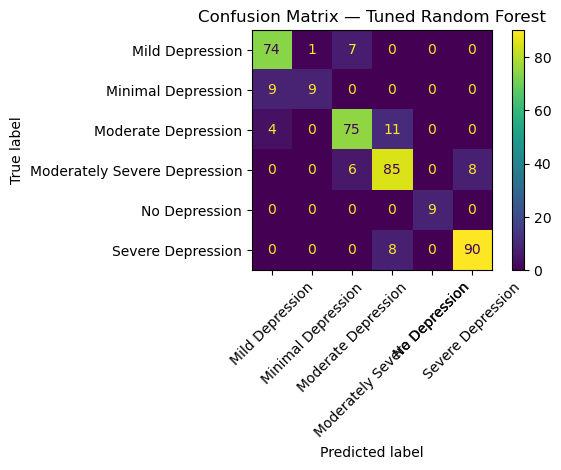

In [10]:

# ---- 8) Simple hyperparameter tuning (Random Forest example) ----
from sklearn.model_selection import GridSearchCV

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(random_state=42, n_jobs=-1))
])

param_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
}

grid = GridSearchCV(
    rf_pipe,
    param_grid=param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=0
)

grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV F1:", grid.best_score_)

best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, best_pred))
print("Test F1 (weighted):", f1_score(y_test, best_pred, average="weighted"))
print(classification_report(y_test, best_pred))

plt.figure(figsize=(7,6))
ConfusionMatrixDisplay.from_predictions(y_test, best_pred, xticks_rotation=45)
plt.title("Confusion Matrix — Tuned Random Forest")
plt.tight_layout()
plt.show()


## Notes (what was fixed)
- The dataset had very long / messy column names, so the notebook **renames** them cleanly.
- Your earlier error `KeyError: 'Depression_Level'` happens because the column is not exactly named that; now we **detect the target column by keywords**.
- Instead of using `LabelEncoder` on mixed columns (causes `TypeError: '<' not supported between str and int`), this uses **OneHotEncoder + ColumnTransformer**.
